In [2]:

import os
import re
from PIL import Image 
os.environ['OPENCV_IO_MAX_IMAGE_PIXELS']= pow(2,40).__str__()
Image.MAX_IMAGE_PIXELS = 1000000000 
import cv2
#from skimage.util.shape import view_as_windows
import numpy as np
from patchify import patchify 
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

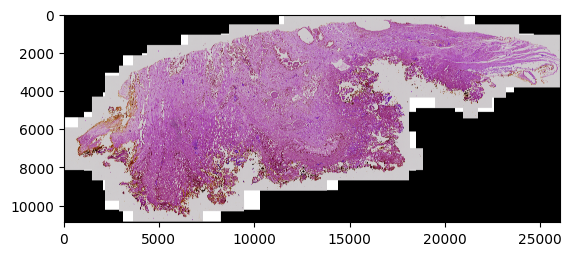

(10880, 26016, 3)


In [3]:
zeiss = cv2.imread("./Subset3_Train_10_Zeiss.tiff",1)

plt.imshow(zeiss)
plt.show()
print(zeiss.shape)

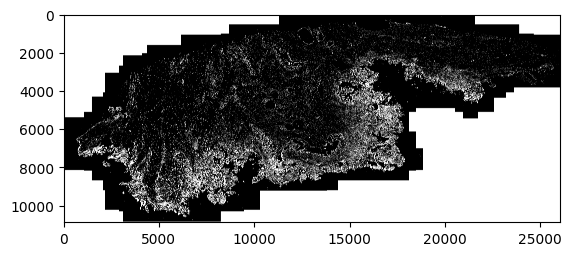

In [4]:
gray = cv2.cvtColor(zeiss, cv2.COLOR_BGR2GRAY)

# cv2.threshold(): choose a threshold (thresh_ostu choose a value between two peaks), https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
#thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]: make graph white&black
#https://blog.csdn.net/lcalqf/article/details/71170171
otsu,thresh = cv2.threshold(gray,1,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(thresh,'gray')
plt.show()



In [15]:
#how many patch can be make
row_num = int(thresh.shape[0]/256)
col_num = int(thresh.shape[1]/256)

print(row_num, col_num)
# cut edge
row_left_top = int((thresh.shape[0]-row_num*256)/2)
row_left_bottom = int((thresh.shape[0]-row_num*256)-row_left_top)
col_left_top = int((thresh.shape[1]-col_num*256)/2)
col_left_bottom = int((thresh.shape[1]-col_num*256)-col_left_top)

patch_mask = np.zeros([row_num,col_num],dtype=int)
patch_mask_annotation = np.zeros([5,row_num,col_num],dtype=int)

patches_img = patchify(thresh[int(row_left_top):int(thresh.shape[0]-row_left_bottom),
                           int(col_left_top):int(thresh.shape[1]-col_left_bottom)], (256, 256), step=256)




42 101


In [16]:
annotation_image = ["./Subset3_Train_10_Zeiss/G3_Mask.tif","./Subset3_Train_10_Zeiss/Normal_Mask.tif","./Subset3_Train_10_Zeiss/Stroma_Mask.tif"]
annotation_mask = []
order_annotation = []


for i in annotation_image:
    img_annotate = cv2.imread(i,0)
    gleason_class = os.path.basename(i).replace('_Mask.tif','')
    order_annotation.append(gleason_class)
    annotation_mask.append(img_annotate)



In [18]:
def align_annotate(sinlgle_patch_index,annotation_mask, order_annotation):
    annotate_dict = {'Normal':0,'Stroma': 0,'G3': 0,'G4': 0,'G5': 0}
    for i in range(len(annotation_mask)):
        img_annotate = annotation_mask[i]
        gleason_class = order_annotation[i]
        patch_annotation = img_annotate[int(sinlgle_patch_index[0]):int(sinlgle_patch_index[1]),
                                        int(sinlgle_patch_index[2]):int(sinlgle_patch_index[3])]
        # how many pixel showed in each class
        if len(np.nonzero(patch_annotation)[0]) > 0 :
            annotate_dict[gleason_class] = 1
    return annotate_dict



In [34]:
count=0
patch_indi = []
for i in range(patches_img.shape[0]):
    for j in range(patches_img.shape[1]):
        single_patch_img = patches_img[i, j,:,:]
        # on thresh, count how many pixel are white
        non_zero = len(np.nonzero(single_patch_img)[0])
        # if the prevalence are less than 0.01%, delete patches
        if (non_zero / (256*256)) > 0.01:
            row_start = int(row_left_top+i*256)
            col_start = int(col_left_top+j*256)
            # index on the original 
            single_patch=[row_start, int(row_start+256),col_start,int(col_start+256)]
            patch_indi.append(single_patch)
            annotation = align_annotate(single_patch, annotation_mask,order_annotation)
            if np.sum(list(annotation.values())) > 0:
                #print(i,j)
                patch_mask[i,j]=1
                for k in range(len(annotation.keys())):
                    #print("have annotation")
                    patch_mask_annotation[k][i,j]=list(annotation.values())[k]


patch_mask_output = cv2.convertScaleAbs(patch_mask, alpha=(255.0))

5 42
5 43
5 44
5 45
6 41
6 42
6 43
6 44
6 45
6 46
6 47
6 48
6 80
6 81
6 82
6 83
6 84
6 85
6 86
6 87
6 88
7 41
7 42
7 43
7 44
7 45
7 46
7 47
7 48
7 49
7 77
7 78
7 79
7 80
7 81
7 82
7 83
7 84
7 85
7 86
7 87
7 88
7 89
7 90
7 91
7 92
8 41
8 42
8 43
8 44
8 45
8 46
8 47
8 48
8 49
8 50
8 75
8 76
8 77
8 78
8 79
8 80
8 81
8 82
8 83
8 84
8 85
8 86
8 87
8 88
8 89
8 90
8 92
9 42
9 43
9 44
9 45
9 46
9 47
9 48
9 49
9 50
9 75
9 76
9 77
9 78
9 79
9 80
9 81
9 82
9 83
9 84
9 85
9 86
9 87
9 88
9 89
9 90
9 91
10 43
10 44
10 45
10 46
10 47
10 48
10 49
10 50
10 78
10 79
10 80
10 81
10 82
10 83
10 84
11 45
11 46
11 47
11 48
11 49
11 50
12 46
12 47
12 48
12 49
13 46
13 47
13 48
14 41
14 42
14 43
14 44
14 45
14 46
14 47
14 48
15 40
15 41
15 42
15 43
15 44
15 45
15 46
15 47
15 48
16 39
16 40
16 41
16 42
16 43
16 44
16 45
16 46
16 47
16 48
17 39
17 40
17 41
17 42
17 43
17 44
17 45
17 46
17 47
17 48
17 49
18 39
18 40
18 42
18 43
18 44
18 45
18 46
18 47
18 48
18 49
19 40
19 41
19 42
19 43
19 44
19 45
19 46
19 47
1

[1344, 1600, 10832, 11088]


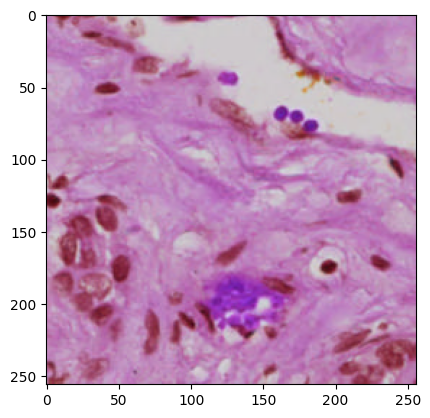

In [39]:
#
i=5
j=42

row_start = int(row_left_top+i*256)
col_start = int(col_left_top+j*256)
single_patch=[row_start, int(row_start+256),col_start,int(col_start+256)]
print(single_patch)
plt.imshow(zeiss[int(single_patch[0]):int(single_patch[1]),
                                        int(single_patch[2]):int(single_patch[3])])
plt.show()

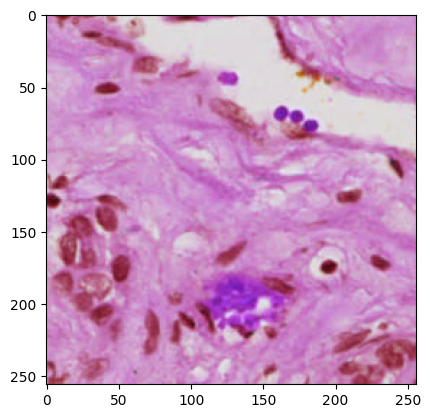

236
normalized


1.0

In [48]:
normalize = cv2.normalize(zeiss[int(single_patch[0]):int(single_patch[1]),
                                        int(single_patch[2]):int(single_patch[3])], None, 0, 1.0,cv2.NORM_MINMAX, dtype=cv2.CV_32F)
plt.imshow(normalize)
plt.show()
print(np.max(zeiss[int(single_patch[0]):int(single_patch[1]),
                                        int(single_patch[2]):int(single_patch[3])]))
print("normalized")
np.max(normalize)


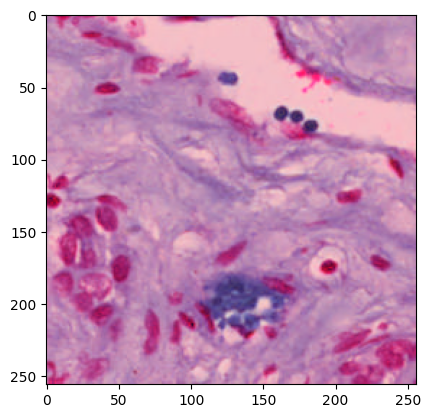

In [54]:
test= zeiss[int(single_patch[0]):int(single_patch[1]),
                                        int(single_patch[2]):int(single_patch[3])]
from histomicstk.preprocessing.color_normalization.\
    deconvolution_based_normalization import deconvolution_based_normalization

stain_unmixing_routine_params = {
    'stains': ['hematoxylin', 'eosin'],
    'stain_unmixing_method': 'macenko_pca',
}

W_target = np.array([
    [0.5807549,  0.08314027,  0.08213795],
    [0.71681094,  0.90081588,  0.41999816],
    [0.38588316,  0.42616716, -0.90380025]
])
norm = deconvolution_based_normalization(
            test, W_target=W_target,
            stain_unmixing_routine_params=stain_unmixing_routine_params)

plt.imshow(norm)
plt.show()

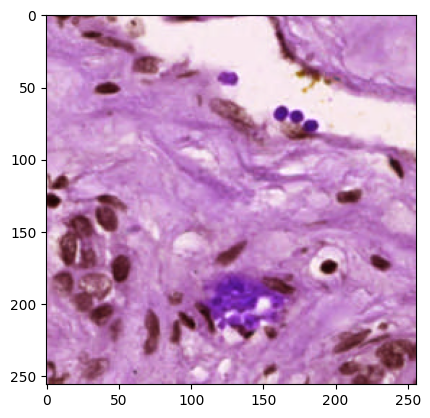

In [53]:
from histomicstk.preprocessing.color_normalization import reinhard
# color norm. standard (from TCGA-A2-A3XS-DX1, Amgad et al, 2019)
cnorm = {
    'mu': np.array([8.74108109, -0.12440419,  0.0444982]),
    'sigma': np.array([0.6135447, 0.10989545, 0.0286032]),
}
rein = reinhard(test,target_mu=cnorm['mu'], target_sigma=cnorm['sigma'])
plt.imshow(rein)
plt.show()

In [13]:
mask_out, _ = get_tissue_mask(
    zeiss, deconvolve_first=True,
    n_thresholding_steps=1, sigma=1.5, min_size=30)
mask_out = resize(
    mask_out == 0, output_shape=zeiss.shape[:2],
    order=0, preserve_range=True) == 1

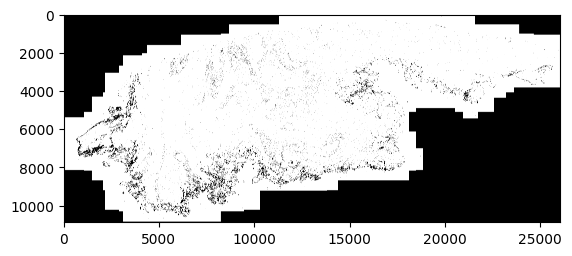

In [14]:
plt.imshow(mask_out,'gray')
plt.show()

In [1]:
import girder_client
import numpy as np
from skimage.transform import resize
from matplotlib import pylab as plt
from matplotlib.colors import ListedColormap
from histomicstk.preprocessing.color_normalization import reinhard
from histomicstk.saliency.tissue_detection import (
    get_slide_thumbnail, get_tissue_mask)
from histomicstk.annotations_and_masks.annotation_and_mask_utils import (
    get_image_from_htk_response)
from histomicstk.preprocessing.color_normalization.\
    deconvolution_based_normalization import deconvolution_based_normalization
from histomicstk.preprocessing.color_deconvolution.\
    color_deconvolution import color_deconvolution_routine, stain_unmixing_routine
from histomicstk.preprocessing.augmentation.\
    color_augmentation import rgb_perturb_stain_concentration, perturb_stain_concentration

# Start girder client and set analysis parameters

In [9]:
APIURL = 'http://candygram.neurology.emory.edu:8080/api/v1/'
SAMPLE_SLIDE_ID = "5d817f5abd4404c6b1f744bb"
gc = girder_client.GirderClient(apiUrl=APIURL)
gc.authenticate(apiKey='kri19nTIGOkWH01TbzRqfohaaDWb6kPecRqGmemb')


ConnectionError: HTTPConnectionPool(host='candygram.neurology.emory.edu', port=8080): Max retries exceeded with url: /api/v1/api_key/token?key=kri19nTIGOkWH01TbzRqfohaaDWb6kPecRqGmemb (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fe13a377040>: Failed to establish a new connection: [Errno 60] Operation timed out'))

In [6]:
APIURL = 'http://candygram.neurology.emory.edu:8080/api/v1/'
SAMPLE_SLIDE_ID = "5d817f5abd4404c6b1f744bb"

gc = girder_client.GirderClient(apiUrl=APIURL)
# gc.authenticate(interactive=True)
gc.authenticate(apiKey='kri19nTIGOkWH01TbzRqfohaaDWb6kPecRqGmemb')

MAG = 1.0

# color norm. standard (from TCGA-A2-A3XS-DX1, Amgad et al, 2019)
cnorm = {
    'mu': np.array([8.74108109, -0.12440419,  0.0444982]),
    'sigma': np.array([0.6135447, 0.10989545, 0.0286032]),
}

# TCGA-A2-A3XS-DX1_xmin21421_ymin37486_.png, Amgad et al, 2019)
# for macenco (obtained using rgb_separate_stains_macenko_pca()
# and reordered such that columns are the order:
# Hamtoxylin, Eosin, Null
W_target = np.array([
    [0.5807549,  0.08314027,  0.08213795],
    [0.71681094,  0.90081588,  0.41999816],
    [0.38588316,  0.42616716, -0.90380025]
])

# visualization color map
vals = np.random.rand(256, 3)
vals[0, ...] = [0.9, 0.9, 0.9]
cMap = ListedColormap(1 - vals)

# for visualization
ymin, ymax, xmin, xmax = 1000, 1500, 2500, 3000

# for reproducibility
np.random.seed(0)

ConnectionError: HTTPConnectionPool(host='candygram.neurology.emory.edu', port=8080): Max retries exceeded with url: /api/v1/api_key/token?key=kri19nTIGOkWH01TbzRqfohaaDWb6kPecRqGmemb (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fe13a7cfa60>: Failed to establish a new connection: [Errno 60] Operation timed out'))

In [5]:
slide_info = gc.get('item/%s/tiles' % SAMPLE_SLIDE_ID)

NameError: name 'gc' is not defined

In [ ]:
# get RGB image at a small magnification
slide_info = gc.get('item/%s/tiles' % SAMPLE_SLIDE_ID)
getStr = "/item/%s/tiles/region?left=%d&right=%d&top=%d&bottom=%d" % (
    SAMPLE_SLIDE_ID, 0, slide_info['sizeX'], 0, slide_info['sizeY']
    ) + "&magnification=%.2f" % MAG

# get mask of things to ignore
thumbnail_rgb = get_slide_thumbnail(gc, SAMPLE_SLIDE_ID)
mask_out, _ = get_tissue_mask(
    thumbnail_rgb, deconvolve_first=True,
    n_thresholding_steps=1, sigma=1.5, min_size=30)
mask_out = resize(
    mask_out == 0, output_shape=zeiss.shape[:2],
    order=0, preserve_range=True) == 1